In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

### 4.1 The exponential distribution

CDF of the exponential distribution is defined as (where lambda determines the shape of the distribution):
$$CDF(x) = 1-e^{-\lambda x}$$
Mean and Median of exponential distribution is computed as follows:
$$Mean = \frac{1}{\lambda}$$
$$Median = \frac{ln(2)}{\lambda}$$
In the real world, exponential distribution is encountered when we look at the series of events and measure the time between them which is called as <b>interval times</b>. The exponential distribution for different values of lambda is shown below. It can be seen that lambda decides the shape of the distribution.

In [2]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2.5, 5000)
mu = 0 # Mean

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(1, 5):
    y = expon.cdf(x, loc=0, scale=1/i) # scale is 1/lambda
    ax.plot(x, y, label='lambda: ' + str(i))
ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.set_title('Exponential CDF')
ax.set_ylim([0, 1])
ax.set_xlim([0, 2.5])
plt.legend()
plt.show()

<Figure size 800x600 with 1 Axes>

Below figure shows the CDF of the interarrival times for the babies born on a particular day in an Australian hospital in minutes. It seems to have the general shape of an exponential distribution. To check that whether a distribution is exponential or not, we can plot the log values and it should be approximately straight line.

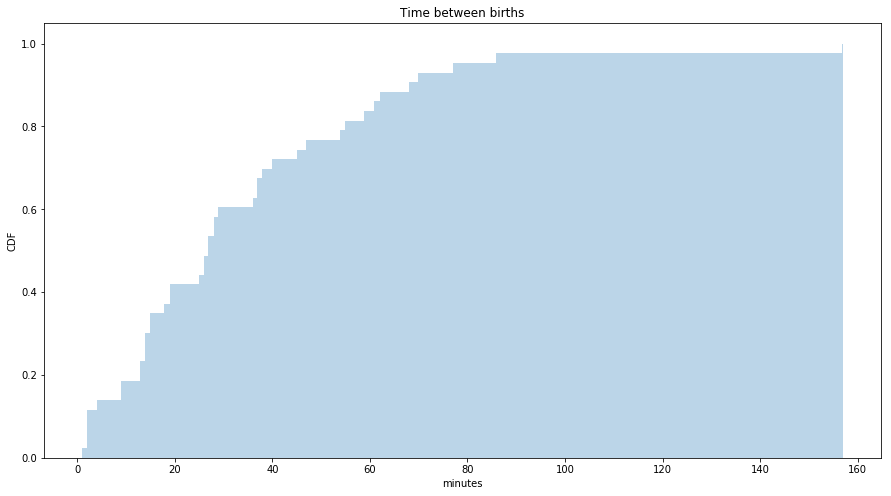

In [3]:
import pandas as pd
import seaborn as sns

babyboom = pd.read_fwf("babyboom.dat", 
                         names=["time", "babysex", "birthwgt_gm", "minutes_after_midnight"],
                         colspecs=[(1, 8), (9, 16), (17, 24), (25, 32)])
s = babyboom.diff()['minutes_after_midnight'].dropna()

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
sns.distplot(s, label='', bins=1000, kde=False, norm_hist=True, hist_kws={"alpha": 0.3, 'cumulative': True})
ax.set_xlabel('minutes')
ax.set_ylabel('CDF')
ax.set_title('Time between births')
plt.show()

### 4.3 The normal distribution

The normal distribution, also called as Gaussian, is the most commonly used distribution as it describes natural phenomenons. The CDF of Normal distribution defined as:
$$CDF(x) = \frac{1}{2}[1 + erf(\frac{x-\mu}{\sigma\sqrt{2}})]$$
$$erf(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x}e^{-t^{2}}dx$$
Here, the parameters mu and sigma are the mean and standard deviation of the distribution. The plot of CDF and PDF for mean 2.0 and standard deviation(sigma) 0.5 is shown below. 

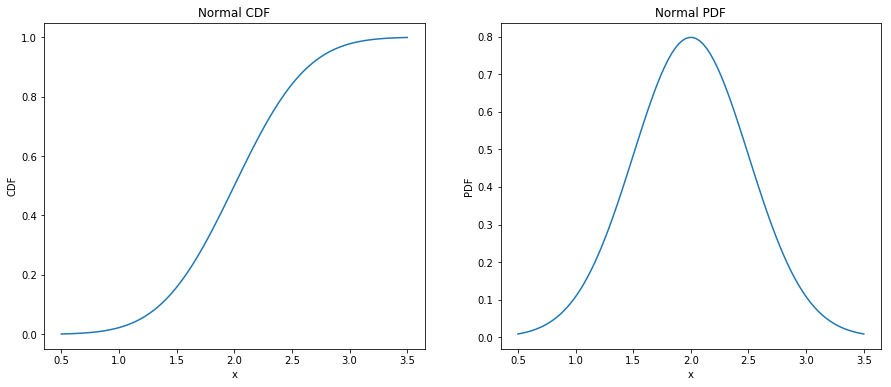

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt

mu = 2.0
sigma = 0.5

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(121)
plt.plot(x, norm.cdf(x, mu, sigma))
ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.set_title('Normal CDF')

ax = fig.add_subplot(122)
plt.plot(x, norm.pdf(x, mu, sigma))
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.set_title('Normal PDF')
plt.show()

The plot of birth weights with the corresponding normal distribution is shown in the figure below. It can easily be noted that there are more light babies then we would expect in a normal distribution.

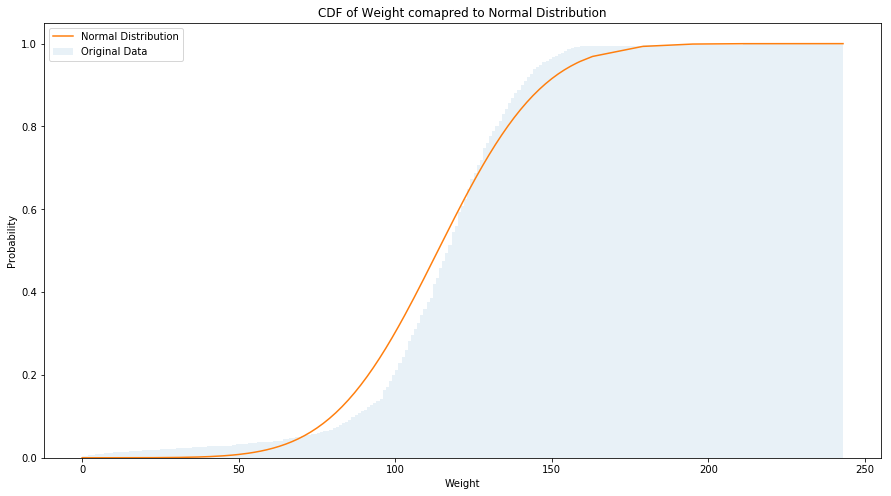

In [5]:
pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
weights = pregnancies[pregnancies['outcome'] == 1][['birthwgt_lb', 'birthwgt_oz']].dropna()
weights = weights['birthwgt_lb']*16 + weights['birthwgt_oz']
bins =  int(weights.max() - weights.min())

mu = weights.mean()
sigma = weights.std()

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
sns.distplot(weights, label='Original Data', bins=bins, kde=False, norm_hist=True, 
             hist_kws={"alpha": 0.1, 'cumulative': True})
plt.plot(weights.sort_values(), norm.cdf(weights.sort_values(), mu, sigma), label='Normal Distribution')
ax.set_xlabel('Weight')
ax.set_ylabel('Probability')
ax.set_title('CDF of Weight comapred to Normal Distribution')
ax.legend()
plt.show()

<b>Exercise 4.7:</b> The Wechsler Adult Intelligence Scale is a test that is intended to measure intelligence3. Results are transformed so that the distribution of scores in the general population is normal with m = 100 and s = 15.

What fraction of the population has an IQ greater than the mean? What fraction is over 115? 130? 145?

In [6]:
import scipy.stats as stats
mu = 100
sigma = 15

rvs = norm.rvs(loc=mu, scale=sigma, size=1000, random_state=None)
print("Percent of population IQ greater than mean: " + str(100 - stats.percentileofscore(rvs, 100, kind='rank')) + "%")
print("Percent of population IQ greater than 115: " + str(100 - stats.percentileofscore(rvs, 115, kind='rank')) + "%")
print("Percent of population IQ greater than 130: " + str(100 - stats.percentileofscore(rvs, 130, kind='rank')) + "%")
print("Percent of population IQ greater than 145: " + str(100 - stats.percentileofscore(rvs, 145, kind='rank')) + "%")

print("Number of population in 6 billion with IQ greater than 190: " + str(6000000000 * norm.ppf(190, loc=100, scale=15)))
# print(norm.ppf(q=105.0, loc=10.0, scale=15.0)) Returning NaN

Percent of population IQ greater than mean: 48.8%
Percent of population IQ greater than 115: 17.599999999999994%
Percent of population IQ greater than 130: 2.5%
Percent of population IQ greater than 145: 0.20000000000000284%
Number of population in 6 billion with IQ greater than 190: nan


<b>Exercise 4.8: </b>Plot the CDF of pregnancy lengths for all live births. Does it look like a normal distribution?

Normal distribution is not a good approximation.

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


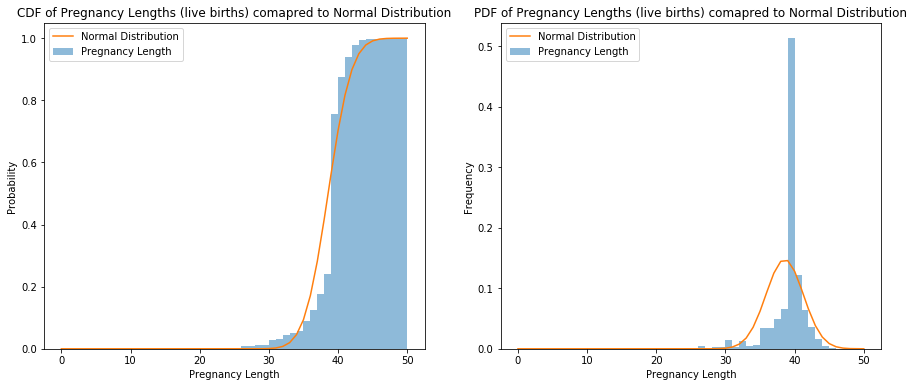

In [7]:
lengths = pregnancies[pregnancies['outcome'] == 1]['prglength'].dropna()
mu = lengths.mean()
sigma = lengths.std()
bins =  int(lengths.max() - lengths.min())

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(121)
sns.distplot(lengths, label='Pregnancy Length', kde=False, norm_hist=True, 
             hist_kws={"alpha": 0.5, 'cumulative': True})
plt.plot(lengths.sort_values(), norm.cdf(lengths.sort_values(), mu, sigma), label='Normal Distribution')
ax.set_xlabel('Pregnancy Length')
ax.set_ylabel('Probability')
ax.set_title('CDF of Pregnancy Lengths (live births) comapred to Normal Distribution')
ax.legend()

ax = fig.add_subplot(122)
sns.distplot(lengths, label='Pregnancy Length', kde=False, norm_hist=True, 
             hist_kws={"alpha": 0.5, 'cumulative': False})
plt.plot(lengths.sort_values(), norm.pdf(lengths.sort_values(), mu, sigma), label='Normal Distribution')
ax.set_xlabel('Pregnancy Length')
ax.set_ylabel('Frequency')
ax.set_title('PDF of Pregnancy Lengths (live births) comapred to Normal Distribution')
ax.legend()

plt.show()

### 4.4 Normal probability plot

<b>Q–Q (quantile-quantile)</b> plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. The <b>normal probability plot</b> is a special case of the Q–Q probability plot for a normal distribution. Normal probability plot for birth weights is shown below. The curvature in this plot suggests that there are deviations from a normal distribution.

<b>Exercise 4.10</b> Write a function called NormalPlot that takes a sequence of values and generates a normal probability plot.

Text(0.5,1,'Normal probability plot of birth weights')

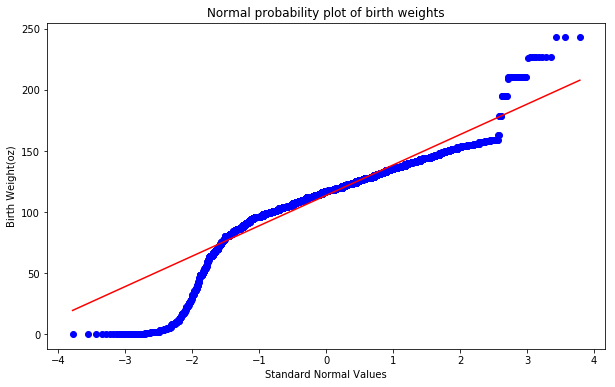

In [8]:
weights = pregnancies[pregnancies['outcome'] == 1][['birthwgt_lb', 'birthwgt_oz']].dropna()
weights = weights['birthwgt_lb']*16 + weights['birthwgt_oz']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
stats.probplot(weights, plot=ax)
ax.set_xlabel('Standard Normal Values')
ax.set_ylabel('Birth Weight(oz)')
ax.set_title('Normal probability plot of birth weights')

<b>Exercise 4.9:</b> Write a function called Sample that generates 6 samples from a normal distribution with m = 0 and s = 1. Sort and return the values.

Write a function called Samples that calls Sample 10000 times and returns a list of 10000 lists. Compute the mean of each of these lists and print the results. I predict
that you will get something like this: {1.2672, 0.6418, 0.2016, 0.2016, 0.6418, 1.2672}

In [9]:
def sample():
    mu = 0
    sigma = 1

    rvs = norm.rvs(loc=mu, scale=sigma, size=6)
    return np.sort(rvs)

def samples():
    l = []
    for i in range(1, 10001):
        l.append(sample())
    return l

l = samples()
df = pd.DataFrame(l)
print(np.array(df.mean()))

[-1.26157157 -0.64021108 -0.19949053  0.19762303  0.63671281  1.26398965]


### 4.5 The lognormal distribution

If the logarithms of a set of values have a normal distribution, the values have a <b>lognormal distribution</b>. The CDF of the lognormal distribution is the same as the CDF of the normal distribution, with log x substituted for x.
$$CDF_{lognormal}(x) = CDF_{normal}(\ln {x})$$

<b>Exercise 4.11</b> Download the BRFSS data from http://thinkstats.com/CDBRFS08.ASC.gz. Write a program that reads adult weights from the BRFSS and generates normal probability plots for w and log w.

In [10]:
brfs_data = pd.read_fwf("CDBRFS08.ASC", 
                       names=["age", "weight2", "wtyrago", "sex", "htm3", "wtkg2"],
                       colspecs=[(100, 102), (119, 122), (127, 130), (142, 143), (1251, 1253),
                                 (1254, 1258)])
brfs_data.head()

,age,weight2,wtyrago,sex,htm3,wtkg2
0,39,195.0,195.0,1,80,8864
1,64,165.0,186.0,2,55,7500
2,87,136.0,140.0,2,99,6182
3,51,220.0,220.0,1,83,0
4,35,140.0,135.0,2,70,6364


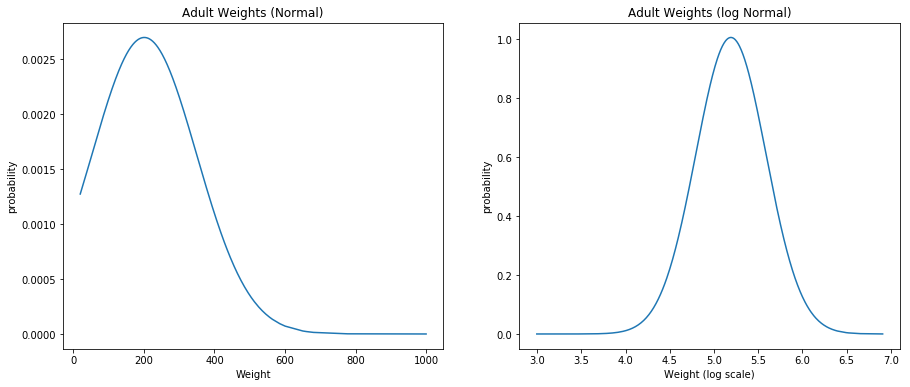

In [11]:
fig = plt.figure(figsize=(15, 6))

# distribution of weights
w = np.sort(np.array(brfs_data["weight2"].dropna()))
mean = np.mean(w)
std = np.std(w)
pdf_weights = norm.pdf(w, mean, std)
ax = fig.add_subplot(121)
plt.plot(w, pdf_weights)
ax.set_xlabel('Weight')
ax.set_ylabel('probability')
ax.set_title('Adult Weights (Normal)')

# distribution of log weights
w = np.log(w)
mean = np.mean(w)
std = np.std(w)
pdf_weights = norm.pdf(w, mean, std)
ax = fig.add_subplot(122)
plt.plot(w, pdf_weights)
ax.set_xlabel('Weight (log scale)')
ax.set_ylabel('probability')
ax.set_title('Adult Weights (log Normal)')

plt.show()

